# Шаг 3. Создание новых признаков

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings

warnings.filterwarnings("ignore")

In [2]:
# импортируем необходимые датафреймы 

IMOEX_df= pd.read_csv('IMOEX_df')
MOEXMM_df = pd.read_csv('MOEXMM_df')
GOLD_df = pd.read_csv('GOLD_df')
USDRUB_df = pd.read_csv('USDRUB_df')
INFLATION_df = pd.read_csv('INFLATION_df')
RESULT_df = pd.read_csv('RESULT_df')

In [3]:
# для дальнейшей установки индексов переводим первые столбцы в формат дат

IMOEX_df['TRADEDATE'] = pd.to_datetime(IMOEX_df['TRADEDATE'])
MOEXMM_df['TRADEDATE'] = pd.to_datetime(MOEXMM_df['TRADEDATE'])
INFLATION_df['TRADEDATE'] = pd.to_datetime(INFLATION_df['TRADEDATE'])
USDRUB_df['TRADEDATE'] = pd.to_datetime(USDRUB_df['TRADEDATE'])
GOLD_df['TRADEDATE'] = pd.to_datetime(GOLD_df['TRADEDATE'])
RESULT_df['TRADEDATE'] = pd.to_datetime(RESULT_df['TRADEDATE'])
RESULT_df.set_index('TRADEDATE')

,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,LOW_MOEXMM,VALUE_MOEXMM,CAPITALIZATION_MOEXMM,Key_rate,Inflation,USD_RUB,Price_GOLD,Day_type,month
TRADEDATE,,,,,,,,,,,,,,,,,,
2013-09-02,1367.530,1364.75,1373.730,1364.27,1.274407e+10,6.096417e+12,2109.53,2103.860,2120.72,2100.19,8.886807e+08,2.345484e+11,8.0,6.27,33.2522,1487.36,рабочий день,9
2013-09-03,1373.820,1366.99,1384.180,1366.99,2.216425e+10,6.124461e+12,2102.51,2109.790,2123.56,2089.09,1.304529e+09,2.337673e+11,8.0,6.27,33.2522,1487.36,рабочий день,9
2013-09-04,1375.660,1372.98,1376.420,1365.21,1.692969e+10,6.132675e+12,2109.74,2101.980,2112.03,2088.95,1.283077e+09,2.345715e+11,8.0,6.27,33.3693,1492.60,рабочий день,9
2013-09-05,1422.400,1375.66,1422.400,1373.29,3.763559e+10,6.341025e+12,2161.35,2110.700,2162.06,2104.88,2.779851e+09,2.403100e+11,8.0,6.27,33.4656,1510.36,рабочий день,9
2013-09-06,1423.400,1421.86,1448.750,1418.80,5.218912e+10,6.345500e+12,2157.45,2159.630,2199.92,2154.78,3.672785e+09,2.398759e+11,8.0,6.27,33.3901,1494.07,рабочий день,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,2766.570,2749.49,2776.330,2738.31,1.093092e+11,5.983264e+12,6176.88,6103.240,6181.53,6060.31,1.694637e+10,6.154491e+11,21.0,9.52,99.6125,8370.83,рабочий день,12
2024-12-27,2757.450,2754.56,2766.030,2743.18,7.307235e+10,5.963554e+12,6163.93,6132.290,6182.21,6104.91,1.077657e+10,6.141592e+11,21.0,9.52,99.2295,8338.65,рабочий день,12
2024-12-28,2786.670,2763.48,2798.490,2763.48,7.881748e+10,6.026748e+12,6284.36,6198.570,6308.68,6194.84,1.164161e+10,6.261580e+11,21.0,9.52,100.5281,8447.77,рабочий день,12


1. Смотреть по цене открытия или закрытия индексов будет некорректным, потому что волатильность в течение дня индекса может быть существенной, поэтому введем новый признак: **среднее значение между ценой открытия и закрытия**

In [4]:
RESULT_df['AVER_IMOEX'] = (RESULT_df['OPEN_IMOEX'] + RESULT_df['CLOSE_IMOEX']) / 2
RESULT_df['AVER_MOEXMM'] = (RESULT_df['OPEN_MOEXMM'] + RESULT_df['CLOSE_MOEXMM']) / 2
RESULT_df.set_index('TRADEDATE', inplace=True)

2) Посмотрим на **динамику индексов**: если цена открытия выше цены закрытия - обозначим как падение, если наоборот - рост

In [5]:
RESULT_df['DYNAMICS_IMOEX'] = np.where(RESULT_df['OPEN_IMOEX'] > RESULT_df['CLOSE_IMOEX'], 'Fall', 'Growth')
RESULT_df

,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,LOW_MOEXMM,...,CAPITALIZATION_MOEXMM,Key_rate,Inflation,USD_RUB,Price_GOLD,Day_type,month,AVER_IMOEX,AVER_MOEXMM,DYNAMICS_IMOEX
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-09-02,1367.530,1364.75,1373.730,1364.27,1.274407e+10,6.096417e+12,2109.53,2103.860,2120.72,2100.19,...,2.345484e+11,8.0,6.27,33.2522,1487.36,рабочий день,9,1366.1400,2106.6950,Growth
2013-09-03,1373.820,1366.99,1384.180,1366.99,2.216425e+10,6.124461e+12,2102.51,2109.790,2123.56,2089.09,...,2.337673e+11,8.0,6.27,33.2522,1487.36,рабочий день,9,1370.4050,2106.1500,Growth
2013-09-04,1375.660,1372.98,1376.420,1365.21,1.692969e+10,6.132675e+12,2109.74,2101.980,2112.03,2088.95,...,2.345715e+11,8.0,6.27,33.3693,1492.60,рабочий день,9,1374.3200,2105.8600,Growth
2013-09-05,1422.400,1375.66,1422.400,1373.29,3.763559e+10,6.341025e+12,2161.35,2110.700,2162.06,2104.88,...,2.403100e+11,8.0,6.27,33.4656,1510.36,рабочий день,9,1399.0300,2136.0250,Growth
2013-09-06,1423.400,1421.86,1448.750,1418.80,5.218912e+10,6.345500e+12,2157.45,2159.630,2199.92,2154.78,...,2.398759e+11,8.0,6.27,33.3901,1494.07,рабочий день,9,1422.6300,2158.5400,Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,2766.570,2749.49,2776.330,2738.31,1.093092e+11,5.983264e+12,6176.88,6103.240,6181.53,6060.31,...,6.154491e+11,21.0,9.52,99.6125,8370.83,рабочий день,12,2758.0300,6140.0600,Growth
2024-12-27,2757.450,2754.56,2766.030,2743.18,7.307235e+10,5.963554e+12,6163.93,6132.290,6182.21,6104.91,...,6.141592e+11,21.0,9.52,99.2295,8338.65,рабочий день,12,2756.0050,6148.1100,Growth
2024-12-28,2786.670,2763.48,2798.490,2763.48,7.881748e+10,6.026748e+12,6284.36,6198.570,6308.68,6194.84,...,6.261580e+11,21.0,9.52,100.5281,8447.77,рабочий день,12,2775.0750,6241.4650,Growth


3. Посмотрим на **спреды индексов**: разницу между наименьшим и наивысшим значением за день

In [6]:
RESULT_df['Spread_IMOEX'] = RESULT_df['HIGH_IMOEX'] - RESULT_df['LOW_IMOEX']
RESULT_df['Spread_MOEXMM'] = RESULT_df['HIGH_MOEXMM'] - RESULT_df['LOW_MOEXMM']

4) Оценим **экономический рост**: индекс IMOEX - индекс капитализации рынка, поэтому его рост говорит о подъеме российского рынка, падение - о преобладании силы продавцов на рынке, соответственно падении рынка. Обычно экономический спад определяется по показателям ВВП (снижение ВВП в течение двух последовательных кварталов не менее чем на 1,5% считается одним из признаков рецессии), однако ВВП - не единственный индикатор рецессии. В случае цен на золото нас интересует не только формальный признак падения, но и настроения на фондовом рынке, которые не отражаются в ВВП. Именно поэтому я не брала ВВП в датафрейм для измерения экономического состояния. Измерять экономическое состояние будем по индексу IMOEX.

Будем определять рецессию через понятие **Death Cross** в трейдинге: негативный сигнал, при котором более короткая скользящая средняя пересекает более длинную сверху вниз. За более короткую возьмем скользяющую среднюю в 50 дней, за длинную - за 200 дней (такие промежутки традиционно используются для расчета)

In [7]:
RESULT_df['SMA_short'] = RESULT_df['CLOSE_IMOEX'].rolling(window=50).mean()
RESULT_df['SMA_long'] = RESULT_df['CLOSE_IMOEX'].rolling(window=200).mean()
RESULT_df

,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,LOW_MOEXMM,...,Price_GOLD,Day_type,month,AVER_IMOEX,AVER_MOEXMM,DYNAMICS_IMOEX,Spread_IMOEX,Spread_MOEXMM,SMA_short,SMA_long
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-09-02,1367.530,1364.75,1373.730,1364.27,1.274407e+10,6.096417e+12,2109.53,2103.860,2120.72,2100.19,...,1487.36,рабочий день,9,1366.1400,2106.6950,Growth,9.460,20.53,NaN,NaN
2013-09-03,1373.820,1366.99,1384.180,1366.99,2.216425e+10,6.124461e+12,2102.51,2109.790,2123.56,2089.09,...,1487.36,рабочий день,9,1370.4050,2106.1500,Growth,17.190,34.47,NaN,NaN
2013-09-04,1375.660,1372.98,1376.420,1365.21,1.692969e+10,6.132675e+12,2109.74,2101.980,2112.03,2088.95,...,1492.60,рабочий день,9,1374.3200,2105.8600,Growth,11.210,23.08,NaN,NaN
2013-09-05,1422.400,1375.66,1422.400,1373.29,3.763559e+10,6.341025e+12,2161.35,2110.700,2162.06,2104.88,...,1510.36,рабочий день,9,1399.0300,2136.0250,Growth,49.110,57.18,NaN,NaN
2013-09-06,1423.400,1421.86,1448.750,1418.80,5.218912e+10,6.345500e+12,2157.45,2159.630,2199.92,2154.78,...,1494.07,рабочий день,9,1422.6300,2158.5400,Growth,29.950,45.14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,2766.570,2749.49,2776.330,2738.31,1.093092e+11,5.983264e+12,6176.88,6103.240,6181.53,6060.31,...,8370.83,рабочий день,12,2758.0300,6140.0600,Growth,38.020,121.22,2595.6108,2863.446000
2024-12-27,2757.450,2754.56,2766.030,2743.18,7.307235e+10,5.963554e+12,6163.93,6132.290,6182.21,6104.91,...,8338.65,рабочий день,12,2756.0050,6148.1100,Growth,22.850,77.30,2599.5558,2860.027450
2024-12-28,2786.670,2763.48,2798.490,2763.48,7.881748e+10,6.026748e+12,6284.36,6198.570,6308.68,6194.84,...,8447.77,рабочий день,12,2775.0750,6241.4650,Growth,35.010,113.84,2603.7950,2856.711900


Видно, что в первых значениях SMA не заполняется, так как не хватает периода для расчета: заполним ее первым значением не равным NaN

In [8]:
first_valid_index = RESULT_df['SMA_short'].first_valid_index()

RESULT_df['filled_SMA_short'] = RESULT_df['SMA_short'].copy()
RESULT_df.loc[:first_valid_index, 'filled_SMA_short'] = RESULT_df['filled_SMA_short'].loc[:first_valid_index].fillna(RESULT_df['SMA_short'][first_valid_index])

RESULT_df['filled_SMA_short'] = RESULT_df['filled_SMA_short'].interpolate()

RESULT_df['SMA_short'] = RESULT_df['filled_SMA_short']
RESULT_df = RESULT_df.drop(['filled_SMA_short'], axis=1)

In [9]:
first_valid_index = RESULT_df['SMA_long'].first_valid_index()

RESULT_df['filled_SMA_long'] = RESULT_df['SMA_long'].copy()
RESULT_df.loc[:first_valid_index, 'filled_SMA_long'] = RESULT_df['filled_SMA_long'].loc[:first_valid_index].fillna(RESULT_df['SMA_long'][first_valid_index])

RESULT_df['filled_SMA_long'] = RESULT_df['filled_SMA_long'].interpolate()

RESULT_df['SMA_long'] = RESULT_df['filled_SMA_long']
RESULT_df = RESULT_df.drop(['filled_SMA_long'], axis=1)

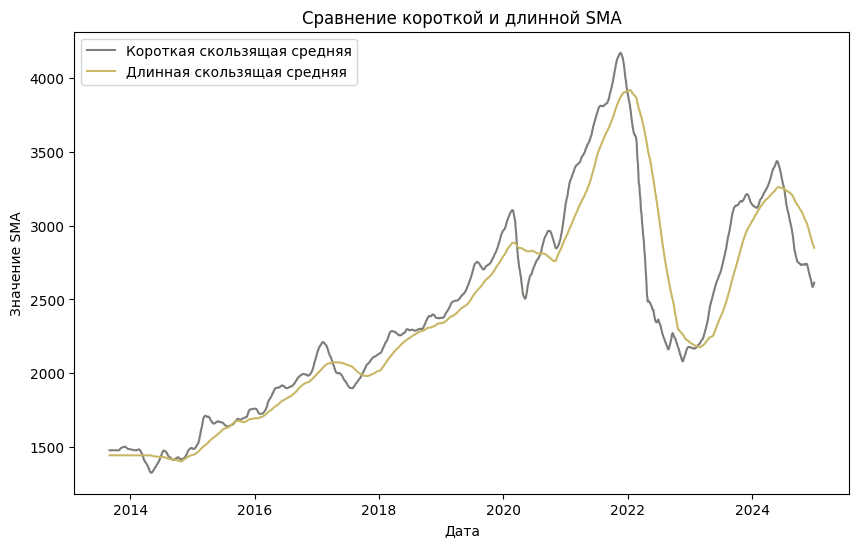

In [10]:
cmap = plt.get_cmap('cividis')
plt.figure(figsize=(10, 6))
plt.plot(RESULT_df.index, RESULT_df['SMA_short'], label='Короткая скользящая средняя',
        color = cmap(0.5))
plt.plot(RESULT_df.index, RESULT_df['SMA_long'], label='Длинная скользящая средняя',
         color = cmap(0.8))
plt.title('Сравнение короткой и длинной SMA')
plt.xlabel('Дата')
plt.ylabel('Значение SMA')
plt.legend()
plt.show()


На графике видно, что death cross встречается на данных несколько раз. Выделим промежутки рецессий и запишем фазу экономического роста в датафрейм

In [11]:
RESULT_df['ECONOMIC_GROWTH'] = np.where(RESULT_df['SMA_long'] > RESULT_df['SMA_short'], 'Recession', 'Rise')
RESULT_df[RESULT_df['ECONOMIC_GROWTH'] == 'Recession']

,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,LOW_MOEXMM,...,Day_type,month,AVER_IMOEX,AVER_MOEXMM,DYNAMICS_IMOEX,Spread_IMOEX,Spread_MOEXMM,SMA_short,SMA_long,ECONOMIC_GROWTH
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2014-03-14,1237.430,1248.290,1248.290,1182.86,8.255097e+10,5.591642e+12,1984.570,2038.750,2038.750,1906.600,...,рабочий день,3,1242.8600,2011.6600,Fall,65.430,132.15,1442.2480,1443.644725,Recession
2014-03-15,1260.565,1242.905,1268.315,1210.19,8.734113e+10,5.696183e+12,2032.295,2014.290,2153.735,1948.215,...,выходной,3,1251.7350,2023.2925,Growth,58.125,205.52,1437.7291,1443.644725,Recession
2014-03-17,1283.700,1237.520,1288.340,1237.52,9.213130e+10,5.800723e+12,2080.020,1989.830,2268.720,1989.830,...,рабочий день,3,1260.6100,2034.9250,Growth,50.820,278.89,1433.7885,1443.644725,Recession
2014-03-18,1335.860,1285.530,1340.160,1278.76,7.132912e+10,6.028589e+12,2147.790,2080.410,2152.700,2080.410,...,рабочий день,3,1310.6950,2114.1000,Growth,61.400,72.29,1430.7681,1443.644725,Recession
2014-03-19,1319.020,1335.840,1352.680,1312.50,6.303717e+10,5.952617e+12,2125.930,2147.540,2183.760,2125.930,...,рабочий день,3,1327.4300,2136.7350,Fall,40.180,57.83,1427.3261,1443.644725,Recession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,2766.570,2749.490,2776.330,2738.31,1.093092e+11,5.983264e+12,6176.880,6103.240,6181.530,6060.310,...,рабочий день,12,2758.0300,6140.0600,Growth,38.020,121.22,2595.6108,2863.446000,Recession
2024-12-27,2757.450,2754.560,2766.030,2743.18,7.307235e+10,5.963554e+12,6163.930,6132.290,6182.210,6104.910,...,рабочий день,12,2756.0050,6148.1100,Growth,22.850,77.30,2599.5558,2860.027450,Recession
2024-12-28,2786.670,2763.480,2798.490,2763.48,7.881748e+10,6.026748e+12,6284.360,6198.570,6308.680,6194.840,...,рабочий день,12,2775.0750,6241.4650,Growth,35.010,113.84,2603.7950,2856.711900,Recession


5. **Индекс относительной силы (RSI)**

RSI показывает отношение среднего приоста цены к среднему падению за период: берутся свечи, которые показали закрытие выше, чем предшествующая свеча и определяется среднее значение того, насколько они выше (через экспоненциальное скользящее среднее). Аналогично делается для свечей, показавших закрытие ниже предыдущей. Отношение этих двух величин - RS - относительная сила. Тогда RSI = 100 - 100/(1+RS)

Период для расчета RSI как правило = 14

In [12]:
def calculate_rsi(RESULT_df, period=14):
    delta = RESULT_df['CLOSE_IMOEX'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    # Скользящие средние для положительных и отрицательных изменений
    roll_up = up.rolling(window=period, min_periods=1).mean()  # Средний рост
    roll_down = down.rolling(window=period, min_periods=1).mean()  # Среднее падение
    RS = roll_up / roll_down
    return RS


RESULT_df['RSI_IMOEX'] = 100 - (100 / (1 + calculate_rsi(RESULT_df)))
RESULT_df.head(20)

,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,LOW_MOEXMM,...,month,AVER_IMOEX,AVER_MOEXMM,DYNAMICS_IMOEX,Spread_IMOEX,Spread_MOEXMM,SMA_short,SMA_long,ECONOMIC_GROWTH,RSI_IMOEX
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-09-02,1367.530,1364.75,1373.730,1364.270,1.274407e+10,6.096417e+12,2109.530,2103.86,2120.720,2100.190,...,9,1366.1400,2106.6950,Growth,9.460,20.530,1477.5253,1443.644725,Rise,NaN
2013-09-03,1373.820,1366.99,1384.180,1366.990,2.216425e+10,6.124461e+12,2102.510,2109.79,2123.560,2089.090,...,9,1370.4050,2106.1500,Growth,17.190,34.470,1477.5253,1443.644725,Rise,100.000000
2013-09-04,1375.660,1372.98,1376.420,1365.210,1.692969e+10,6.132675e+12,2109.740,2101.98,2112.030,2088.950,...,9,1374.3200,2105.8600,Growth,11.210,23.080,1477.5253,1443.644725,Rise,100.000000
2013-09-05,1422.400,1375.66,1422.400,1373.290,3.763559e+10,6.341025e+12,2161.350,2110.70,2162.060,2104.880,...,9,1399.0300,2136.0250,Growth,49.110,57.180,1477.5253,1443.644725,Rise,100.000000
2013-09-06,1423.400,1421.86,1448.750,1418.800,5.218912e+10,6.345500e+12,2157.450,2159.63,2199.920,2154.780,...,9,1422.6300,2158.5400,Growth,29.950,45.140,1477.5253,1443.644725,Rise,100.000000
2013-09-07,1437.470,1422.63,1452.015,1420.125,4.899117e+10,6.408227e+12,2174.695,2161.88,2199.665,2159.455,...,9,1430.0500,2168.2875,Growth,31.890,40.210,1477.5253,1443.644725,Rise,100.000000
2013-09-09,1451.540,1423.40,1455.280,1421.450,4.579322e+10,6.470954e+12,2191.940,2164.13,2199.410,2164.130,...,9,1437.4700,2178.0350,Growth,33.830,35.280,1477.5253,1443.644725,Rise,100.000000
2013-09-10,1453.570,1451.54,1464.200,1446.970,4.892904e+10,6.480001e+12,2234.300,2195.60,2238.430,2195.600,...,9,1452.5550,2214.9500,Growth,17.230,42.830,1477.5253,1443.644725,Rise,100.000000
2013-09-11,1454.120,1452.52,1459.680,1449.580,3.068467e+10,6.482454e+12,2205.880,2234.30,2238.070,2204.980,...,9,1453.3200,2220.0900,Growth,10.100,33.090,1477.5253,1443.644725,Rise,100.000000


In [13]:
first_valid_index = RESULT_df['RSI_IMOEX'].first_valid_index()

RESULT_df['filled_RSI_IMOEX'] = RESULT_df['RSI_IMOEX'].copy()
RESULT_df.loc[:first_valid_index, 'filled_RSI_IMOEX'] = RESULT_df['filled_RSI_IMOEX'].loc[:first_valid_index].fillna(RESULT_df['RSI_IMOEX'][first_valid_index])

RESULT_df['filled_RSI_IMOEX'] = RESULT_df['filled_RSI_IMOEX'].interpolate()

RESULT_df['RSI_IMOEX'] = RESULT_df['filled_RSI_IMOEX']
RESULT_df = RESULT_df.drop(['filled_RSI_IMOEX'], axis=1)

6. Посмотрим **волатильность рынка**

Источник про интерпретацию ATR: https://www.okx.com/en-eu/learn/what-is-average-true-range

Для этого будем использовать показатель ATR. Алгоритм расчета ATR заключается в следующем: 1. 'H-L' - разница между текущими максимум и минимумом 2. 'H-PC' - абсолютное значение разницы между текущим максимумом и предыдущим закрытием 3. 'L-PC' - абсолютное значение разнницы между текущим минимумом и предыдущим закрытием. TR - это наибольшее из этих трех значений, а ATR - скользящее среднее с периодом 14 дней.

ATR в основном используется в качестве индикатора волатильности. Высокое значение ATR указывает на то, что цена актива сильно меняется в течение определённого периода, а низкое значение ATR указывает на меньшую волатильность. ATR можно использовать для сравнения волатильности разных активов, а также для выявления изменений волатильности с течением времени.

In [14]:
RESULT_df['H-L'] = RESULT_df['HIGH_IMOEX'] - RESULT_df['LOW_IMOEX']
RESULT_df['H-PC'] = abs(RESULT_df['HIGH_IMOEX'] - RESULT_df['CLOSE_IMOEX'].shift(1))
RESULT_df['L-PC'] = abs(RESULT_df['LOW_IMOEX'] - RESULT_df['CLOSE_IMOEX'].shift(1))
RESULT_df['TR'] = RESULT_df[['H-L', 'H-PC', 'L-PC']].max(axis=1) 
RESULT_df['ATR_IMOEX'] = RESULT_df['TR'].rolling(window=14).mean()
RESULT_df = RESULT_df.drop(['H-L', 'H-PC', 'L-PC', 'TR'], axis=1)
RESULT_df.head(20)

,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,LOW_MOEXMM,...,AVER_IMOEX,AVER_MOEXMM,DYNAMICS_IMOEX,Spread_IMOEX,Spread_MOEXMM,SMA_short,SMA_long,ECONOMIC_GROWTH,RSI_IMOEX,ATR_IMOEX
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-09-02,1367.530,1364.75,1373.730,1364.270,1.274407e+10,6.096417e+12,2109.530,2103.86,2120.720,2100.190,...,1366.1400,2106.6950,Growth,9.460,20.530,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-03,1373.820,1366.99,1384.180,1366.990,2.216425e+10,6.124461e+12,2102.510,2109.79,2123.560,2089.090,...,1370.4050,2106.1500,Growth,17.190,34.470,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-04,1375.660,1372.98,1376.420,1365.210,1.692969e+10,6.132675e+12,2109.740,2101.98,2112.030,2088.950,...,1374.3200,2105.8600,Growth,11.210,23.080,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-05,1422.400,1375.66,1422.400,1373.290,3.763559e+10,6.341025e+12,2161.350,2110.70,2162.060,2104.880,...,1399.0300,2136.0250,Growth,49.110,57.180,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-06,1423.400,1421.86,1448.750,1418.800,5.218912e+10,6.345500e+12,2157.450,2159.63,2199.920,2154.780,...,1422.6300,2158.5400,Growth,29.950,45.140,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-07,1437.470,1422.63,1452.015,1420.125,4.899117e+10,6.408227e+12,2174.695,2161.88,2199.665,2159.455,...,1430.0500,2168.2875,Growth,31.890,40.210,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-09,1451.540,1423.40,1455.280,1421.450,4.579322e+10,6.470954e+12,2191.940,2164.13,2199.410,2164.130,...,1437.4700,2178.0350,Growth,33.830,35.280,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-10,1453.570,1451.54,1464.200,1446.970,4.892904e+10,6.480001e+12,2234.300,2195.60,2238.430,2195.600,...,1452.5550,2214.9500,Growth,17.230,42.830,1477.5253,1443.644725,Rise,100.000000,NaN
2013-09-11,1454.120,1452.52,1459.680,1449.580,3.068467e+10,6.482454e+12,2205.880,2234.30,2238.070,2204.980,...,1453.3200,2220.0900,Growth,10.100,33.090,1477.5253,1443.644725,Rise,100.000000,NaN


Часть данных в начале опять не заполнена, потому что скользящей средней не хватает промежутка времени. Заполним ее по аналогии с предыдущими значениями первым значением, которое встречается

In [15]:
first_valid_index = RESULT_df['ATR_IMOEX'].first_valid_index()

RESULT_df['filled_ATR_IMOEX'] = RESULT_df['ATR_IMOEX'].copy()
RESULT_df.loc[:first_valid_index, 'filled_ATR_IMOEX'] = RESULT_df['filled_ATR_IMOEX'].loc[:first_valid_index].fillna(RESULT_df['ATR_IMOEX'][first_valid_index])

RESULT_df['filled_ATR_IMOEX'] = RESULT_df['filled_ATR_IMOEX'].interpolate()

RESULT_df['ATR_IMOEX'] = RESULT_df['filled_ATR_IMOEX']
RESULT_df = RESULT_df.drop(['filled_ATR_IMOEX'], axis=1)

7. **Цена золота с лагом в 7 дней**

In [16]:
RESULT_df['Price_GOLD_Lagged'] = RESULT_df['Price_GOLD'].shift(7)

In [17]:
first_valid_index = RESULT_df['Price_GOLD_Lagged'].first_valid_index()

RESULT_df['filled_Price_GOLD_Lagged'] = RESULT_df['Price_GOLD_Lagged'].copy()
RESULT_df.loc[:first_valid_index, 'filled_Price_GOLD_Lagged'] = RESULT_df['filled_Price_GOLD_Lagged'].loc[:first_valid_index].fillna(RESULT_df['Price_GOLD_Lagged'][first_valid_index])

RESULT_df['filled_Price_GOLD_Lagged'] = RESULT_df['filled_Price_GOLD_Lagged'].interpolate()

RESULT_df['Price_GOLD_Lagged'] = RESULT_df['filled_Price_GOLD_Lagged']
RESULT_df = RESULT_df.drop(['filled_Price_GOLD_Lagged'], axis=1)

**Итого у нас вышло:**

In [18]:
RESULT_df

,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,LOW_MOEXMM,...,AVER_MOEXMM,DYNAMICS_IMOEX,Spread_IMOEX,Spread_MOEXMM,SMA_short,SMA_long,ECONOMIC_GROWTH,RSI_IMOEX,ATR_IMOEX,Price_GOLD_Lagged
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-09-02,1367.530,1364.75,1373.730,1364.27,1.274407e+10,6.096417e+12,2109.53,2103.860,2120.72,2100.19,...,2106.6950,Growth,9.460,20.53,1477.5253,1443.644725,Rise,100.000000,22.518929,1487.36
2013-09-03,1373.820,1366.99,1384.180,1366.99,2.216425e+10,6.124461e+12,2102.51,2109.790,2123.56,2089.09,...,2106.1500,Growth,17.190,34.47,1477.5253,1443.644725,Rise,100.000000,22.518929,1487.36
2013-09-04,1375.660,1372.98,1376.420,1365.21,1.692969e+10,6.132675e+12,2109.74,2101.980,2112.03,2088.95,...,2105.8600,Growth,11.210,23.08,1477.5253,1443.644725,Rise,100.000000,22.518929,1487.36
2013-09-05,1422.400,1375.66,1422.400,1373.29,3.763559e+10,6.341025e+12,2161.35,2110.700,2162.06,2104.88,...,2136.0250,Growth,49.110,57.18,1477.5253,1443.644725,Rise,100.000000,22.518929,1487.36
2013-09-06,1423.400,1421.86,1448.750,1418.80,5.218912e+10,6.345500e+12,2157.45,2159.630,2199.92,2154.78,...,2158.5400,Growth,29.950,45.14,1477.5253,1443.644725,Rise,100.000000,22.518929,1487.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,2766.570,2749.49,2776.330,2738.31,1.093092e+11,5.983264e+12,6176.88,6103.240,6181.53,6060.31,...,6140.0600,Growth,38.020,121.22,2595.6108,2863.446000,Recession,71.845321,71.607500,8789.27
2024-12-27,2757.450,2754.56,2766.030,2743.18,7.307235e+10,5.963554e+12,6163.93,6132.290,6182.21,6104.91,...,6148.1100,Growth,22.850,77.30,2599.5558,2860.027450,Recession,71.985924,70.983214,8711.38
2024-12-28,2786.670,2763.48,2798.490,2763.48,7.881748e+10,6.026748e+12,6284.36,6198.570,6308.68,6194.84,...,6241.4650,Growth,35.010,113.84,2603.7950,2856.711900,Recession,75.962421,69.630357,8763.67


# Шаг 4. Визуализация

1. **Посмотрим на данные в целом:**

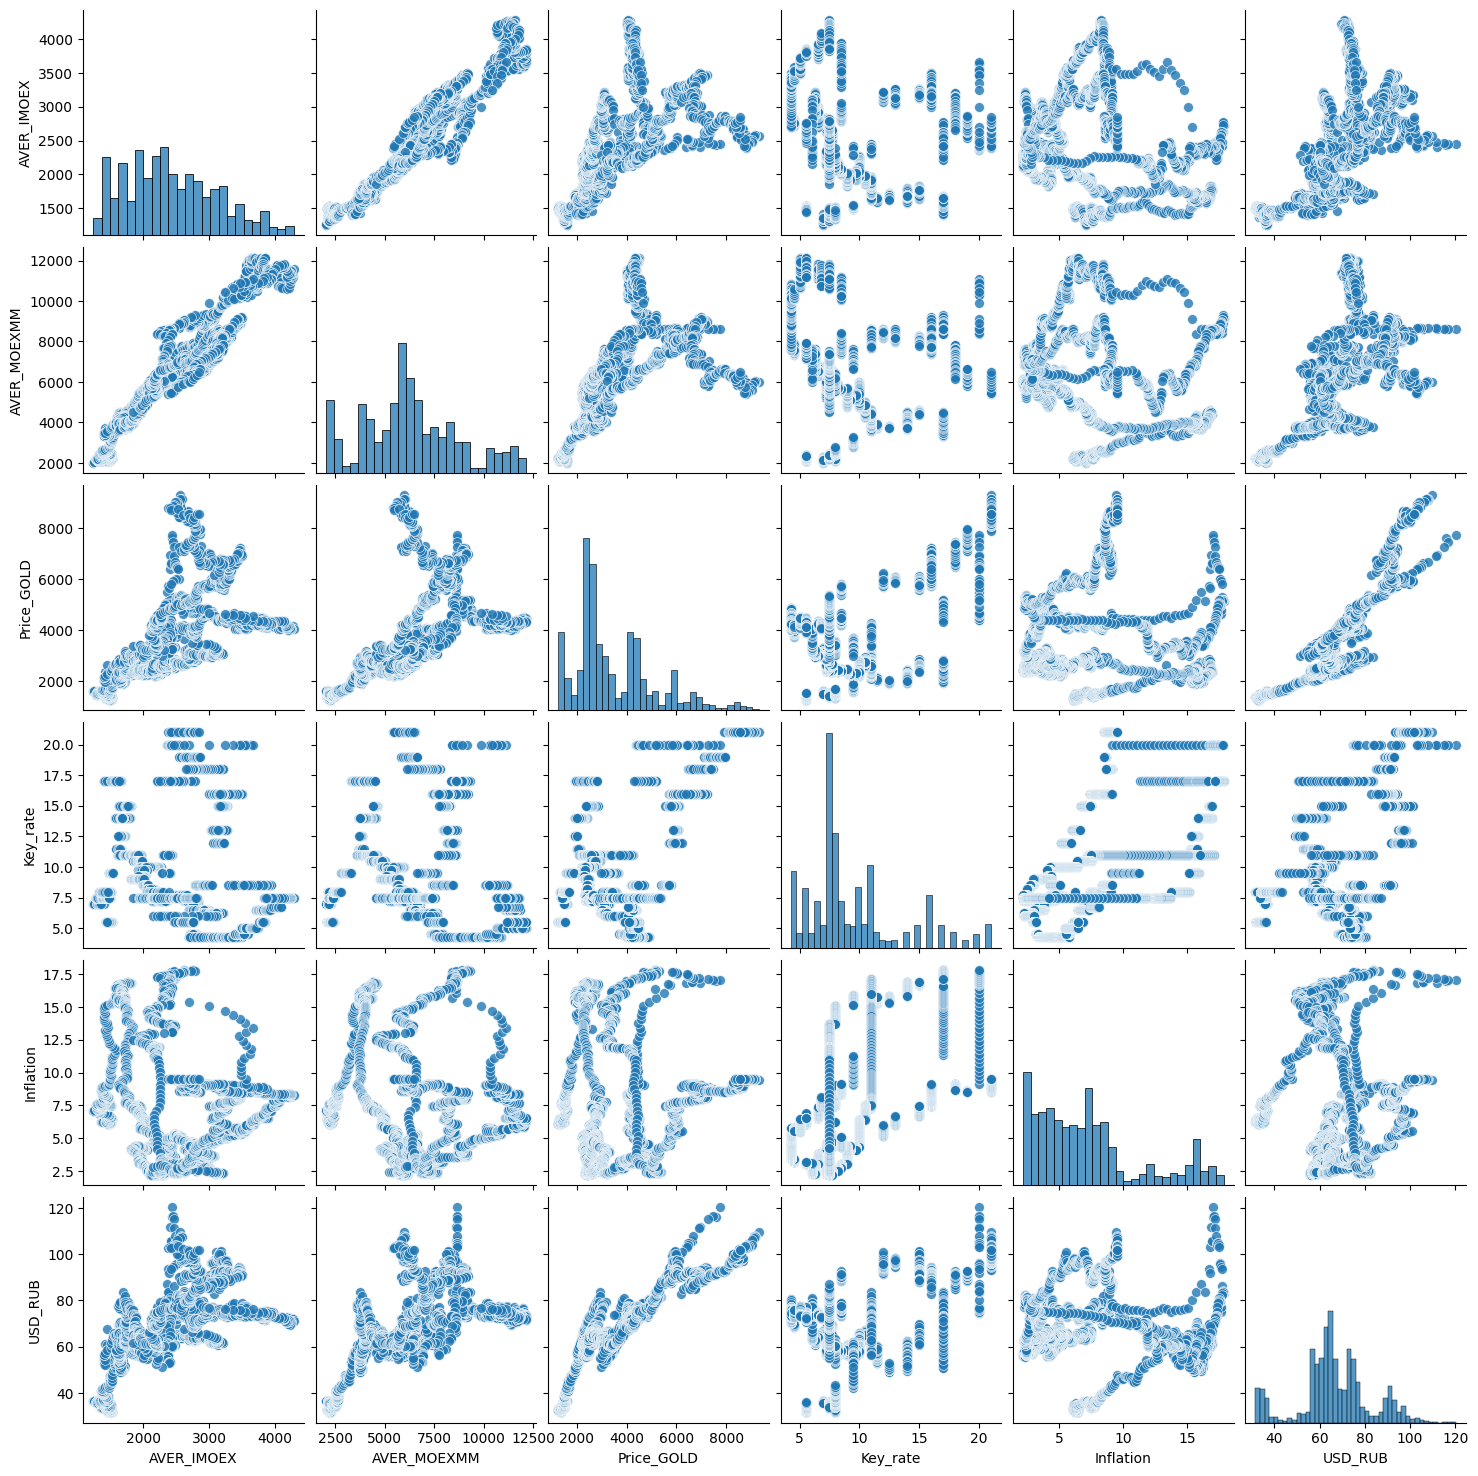

In [19]:
columns=["AVER_IMOEX", "AVER_MOEXMM", "Price_GOLD", "Key_rate", "Inflation", "USD_RUB"]
data = RESULT_df[columns]

sns.pairplot(data, palette="coolwarm", plot_kws={
                                        "edgecolor": "white",
                                        "linewidth": 0.5,
                                        "s": 50,
                                        "alpha": 0.8,
                                    },
            )
plt.show()

**Выводы**: 

* Очевидна очень сильная корреляция между индексами IMOEX и MOEXMM, это означает что в дальнейшем для анализа нам надо выбрать один индекс, который наиболее сильно коррелирует с золотом во избержании зависимых переменных в регрессии (далее это предположение надо подтвердить на heatmap)

* Корреляционные облака Inflation и Key Rate ведут себя необычно, однако это связано с тем, что данные были собраны по месяцам, а в дальнейшем заполнены так, чтобы они соответствовали дневным. Однако логика поведения инфляции и ключевой ставки была соблюдена, поэтому это не нарушает анализа, однако корреляционные облака в их случаях анализировать бессмыссленно (корреляционное облако между ценой на золото и инфляцией также не несет информации, хотя золото как правило служит хэджиующим активом против инфляции, поэтому рассмотрим в дальнейшем их взаимосвязь на линейных графиках)

* Есть заметная (очень близкая к линейной) связь между ценой золота и курсом доллар рубль, что говорит о потенциальной гипотезы зависимости цены на золота от курса доллар рубль. Более того, есть связь между курсом доллар рубль и индексами IMOEX и MOEXMM, хотя корреляционное облако MOEXMM и USD_RUB более разбросано, чем IMOEX USD RUB, что неинтуитивно: IMOEX включает в себя компании, крупнейшие по капитализации но со всех секторов, которые в том числе могут не зависеть от курса, в то время как MOEXMM - металлы и добыча, которые имеют сильную зависимость от курса доллара, так как российские металлы - статья экспортных доходов

* Посмотрим на распределения: USD_RUB имеет схожее с нормальным распределением; в случае инфляции и ключевой ставки нельзя выделить какое то однозначное распределение, цена золота имеет распределение схожее с усеченным нормальным, то есть оно несимметрично; MOEXMM и IMOEX имеют распределение, которое можно аппроксимировать к нормальному

2. **Посмотрим на цены золота и на возможные компоненты ее образования:**

Для этого проведем анализ временного ряда золота. Источник: https://teletype.in/@pythontalk/time_series_forecasting

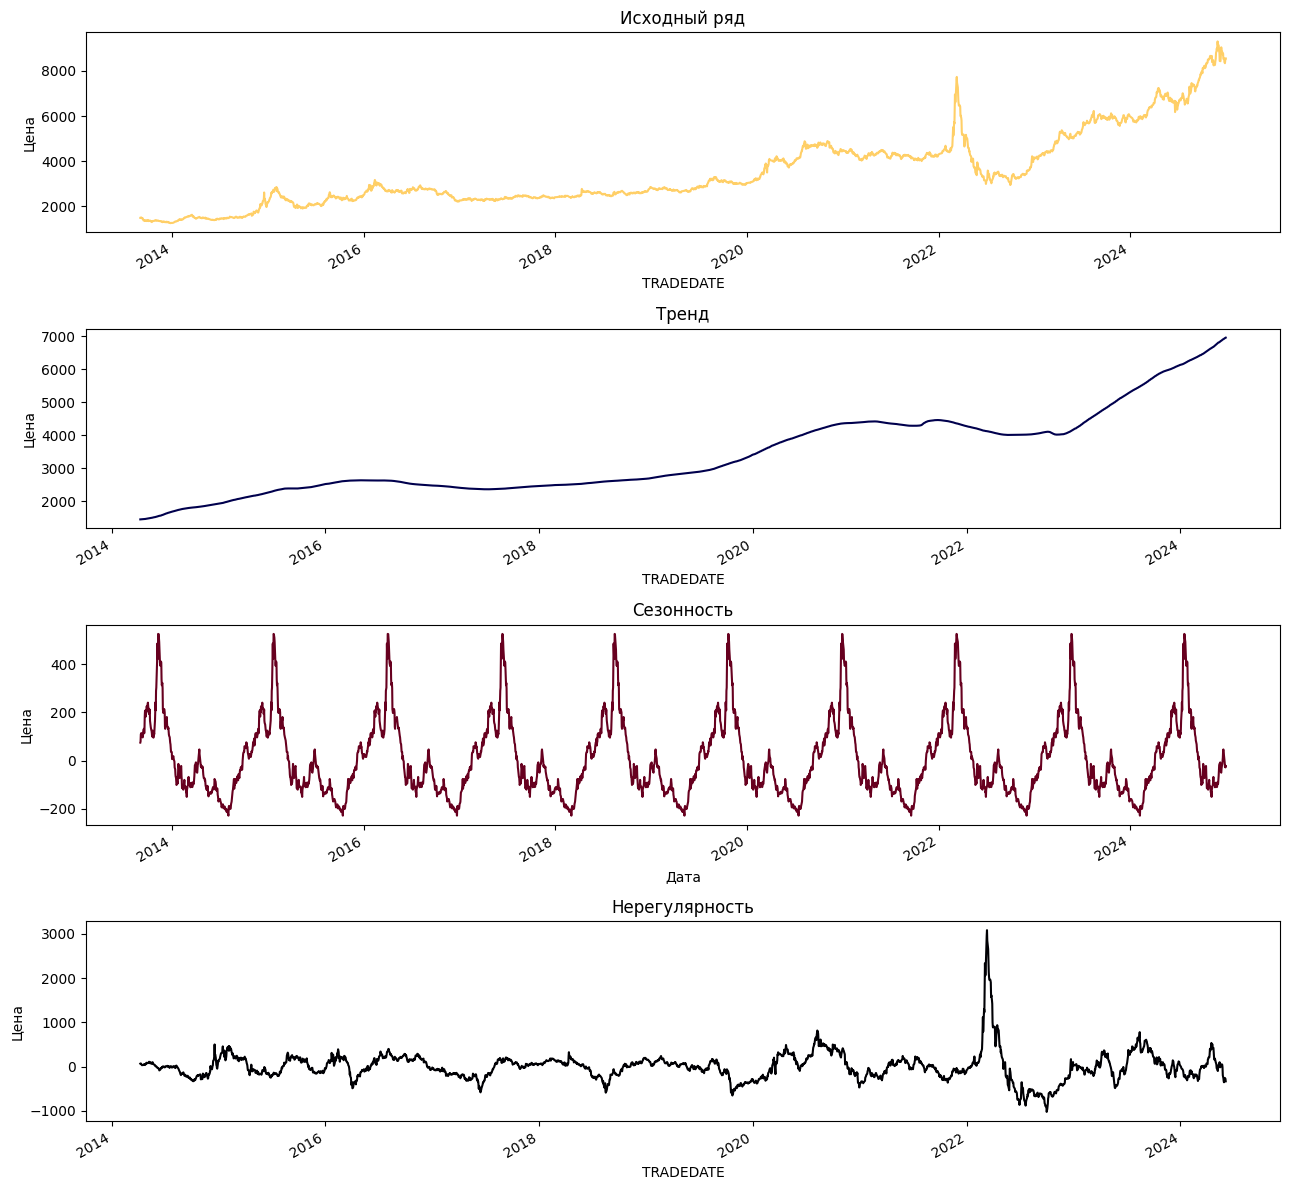

In [20]:
decomposition = sm.tsa.seasonal_decompose(RESULT_df['Price_GOLD'].dropna(), model='additive', period=365)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(13, 12))
color = plt.get_cmap('cividis')
decomposition.observed.plot(ax=ax1, cmap = 'managua')

ax1.set_ylabel('Цена')
ax1.set_title('Исходный ряд')

# Тренд
decomposition.trend.plot(ax=ax2, cmap = 'seismic')
ax2.set_ylabel('Цена')
ax2.set_title('Тренд')

# Сезонность
decomposition.seasonal.plot(ax=ax3, cmap = 'RdGy')
ax3.set_ylabel('Цена')
ax3.set_xlabel('Дата')
ax3.set_title('Сезонность')

# Нерегулярность
decomposition.resid.plot(ax=ax4, cmap = 'magma')
ax4.set_ylabel('Цена')
ax3.set_xlabel('Дата')
ax4.set_title('Нерегулярность')

plt.tight_layout()
plt.show()

**Выводы:**

* С 2014 года тренд цен на золото был восходящим, причем с 2020 года динамика усилилась. При этом после 2020 года было довольно сильное увеличение цен из за ковида (из за роста неопределенности инвесторы перекладывали деньги в золото как в стабильный актив, и роста инфляции в период ковида). А после 2022 года цены на золото резко подскочили из за возросшей неопределенности и желания инвесторов переложить средства в стабильные и безрисковые активы, такие как золото

* Тренд показывает что в долгосрочном периоде скорее всего цены на золото будут расти и дальше

* На графике сезонности заметна сильная подверженность золота сезонности, которая как правило связана с сезонами покупки золота (например, свадебный сезон в Индии, который проходит осенью, Китайский новый год в конце февраля)

* Нерегулярность, как компонент временного ряда, отражает непредсказуемые и случайные колебания в ценах, которые могут быть вызваны различными экономическими и политическими факторами. Таким образом, можно заметить сильную нерегулярность после 2022 года. Таким образом, золото сильно реагирует на политические и экономические нестабильности, и в такие периоды цены на него сильно растут

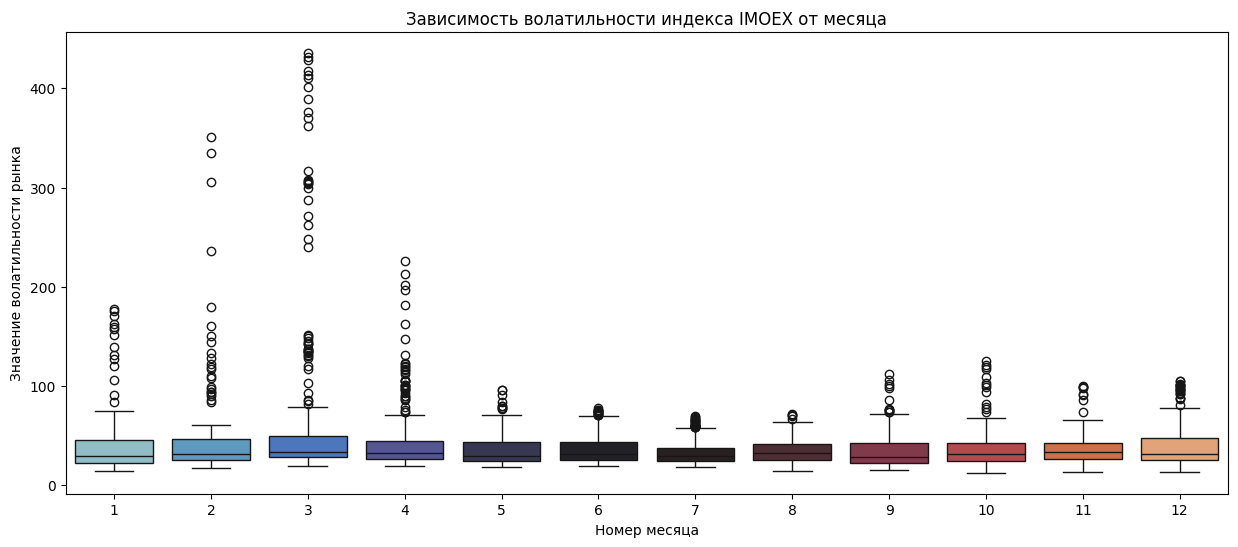

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="month", y="ATR_IMOEX", data=RESULT_df, palette = 'icefire')
plt.ylabel('Значение волатильности рынка')
plt.xlabel('Номер месяца')
plt.title("Зависимость волатильности индекса IMOEX от месяца")
plt.show()

**Выводы:** С января по апрель волатильность рынка наибольшая и наблюдается значительно больше выбросов. С мая по декабрь волатильность индекса IMOEX несколько ниже, при этом выбросов мало

С января по апрель традиционно публикуются годовые отчеты компаний и инвесторы пересматривают стратегии, поэтому, возможно, они перекладывают средства в золото, чтобы компенсировать возможную волатильность рынка или изменения в положении компаний, в которые они инвестировали ранее. Также в январе часто происходят изменения законодательства (яркий пример - повышение ставки налога на прибыль), что также создает волатильность рынка.

На основании сделанных выводов можно сформулировать следующую гипотезу: **В январе, феврале, марте, октябре и ноябре - цена золота достигает наивысших значений из за фактора сезонности или сезонность оказывает значимое влияние на повышение цены золота.**

3. **Сравним динамику индексов MOEXMM и IMOEX**

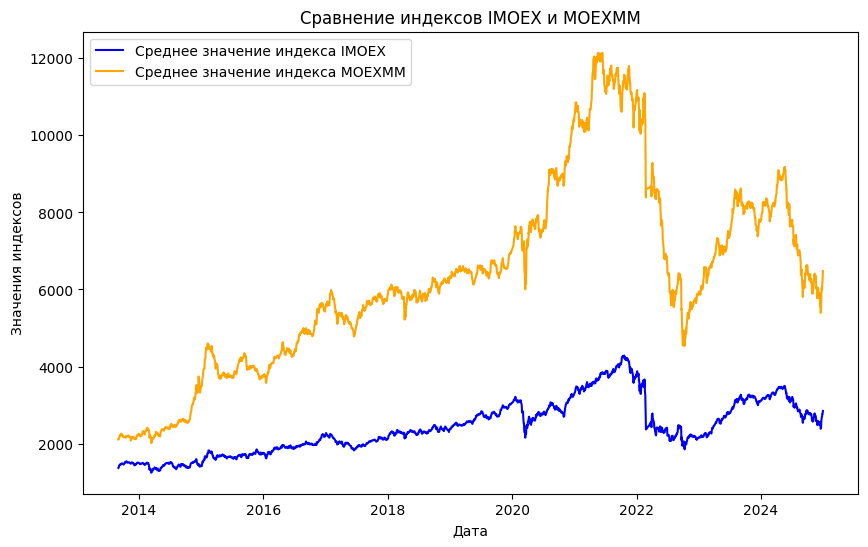

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(RESULT_df, x = 'TRADEDATE', y = 'AVER_IMOEX', label = 'Среднее значение индекса IMOEX', color = 'blue')
sns.lineplot(RESULT_df, x = 'TRADEDATE', y = 'AVER_MOEXMM', label = 'Среднее значение индекса MOEXMM', color = 'orange')
plt.ylabel('Значения индексов')
plt.xlabel('Дата')
plt.title('Сравнение индексов IMOEX и MOEXMM')
plt.legend();

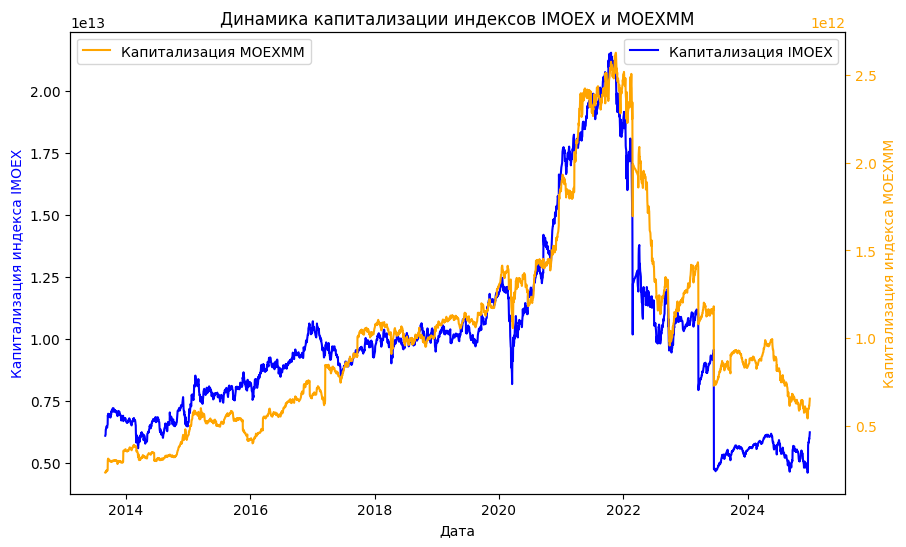

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = plt.subplot()
ax2 = ax1.twinx()
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='CAPITALIZATION_IMOEX', ax=ax1, color = 'blue', label='Капитализация IMOEX')
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='CAPITALIZATION_MOEXMM', ax=ax2, color = 'orange',  label='Капитализация MOEXMM')

ax1.set_ylabel('Капитализация индекса IMOEX', color='blue') 
ax2.set_ylabel('Капитализация индекса MOEXMM', color='orange')
ax1.set_xlabel('Дата')
ax2.tick_params(axis='y', colors='orange')
ax1.grid(False)
ax2.grid(False)

plt.title('Динамика капитализации индексов IMOEX и MOEXMM')
plt.legend()


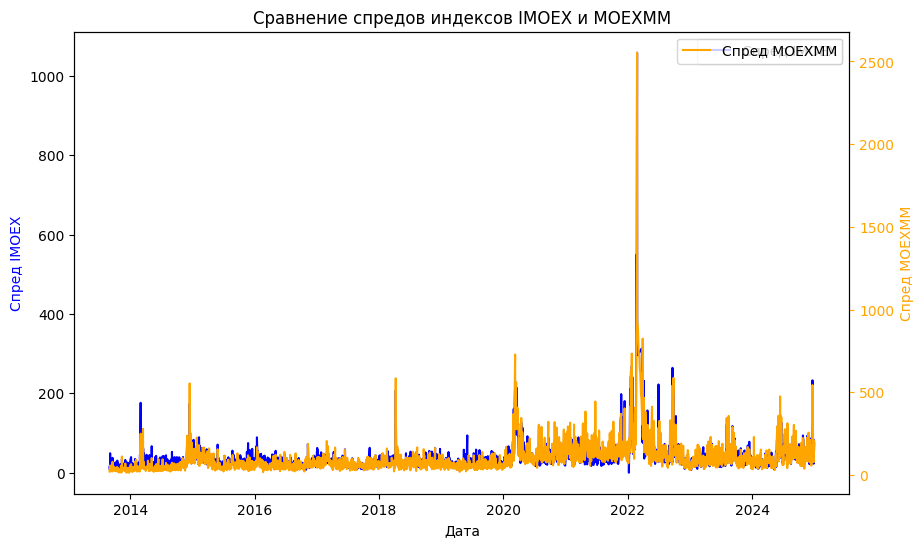

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = plt.subplot()
ax2 = ax1.twinx()
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='Spread_IMOEX', ax=ax1, color = 'blue', label='Спред IMOEX')
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='Spread_MOEXMM', ax=ax2, color = 'orange',  label='Спред MOEXMM')

ax1.set_ylabel('Спред IMOEX', color='blue') 
ax2.set_ylabel('Спред MOEXMM', color='orange')
ax1.set_xlabel('Дата')
ax2.tick_params(axis='y', colors='orange')
ax1.grid(False)
ax2.grid(False)

plt.title('Сравнение спредов индексов IMOEX и MOEXMM')
plt.legend()

plt.show()

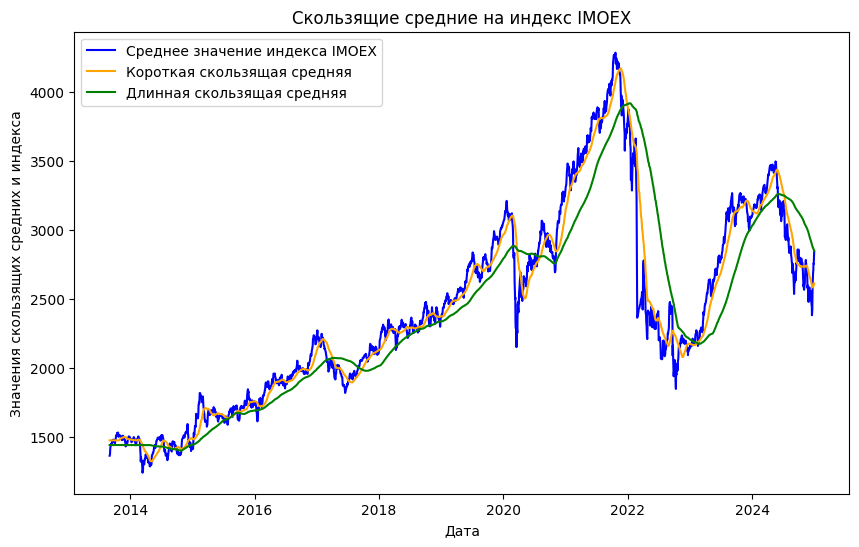

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(RESULT_df, x = 'TRADEDATE', y = 'AVER_IMOEX', label = 'Среднее значение индекса IMOEX', color = 'blue' )
sns.lineplot(RESULT_df, x = 'TRADEDATE', y = 'SMA_short', label = 'Короткая скользящая средняя', color = 'orange')
sns.lineplot(RESULT_df, x = 'TRADEDATE', y = 'SMA_long', label = 'Длинная скользящая средняя', color = 'green')
plt.ylabel('Значения скользящих средних и индекса')
plt.xlabel('Дата')
plt.title('Скользящие средние на индекс IMOEX')
plt.legend();

**Выводы:**

* По графикам видно, что капитализации, динамики цен, динамики спредов индексов IMOEX и MOEXMM обладают практически идентичным поведением. Компании из MOEXMM - частично являются входящими в индекс IMOEX, поэтому добавление обоих индексов как факторов, от которых зависит золото - некорректно, потому что они мультиколлениарны. Поэтому мы посмотрим на корреляцию между индексами и золотом и выберем более коррелируемый

* По графикам скользящих средних для IMOEX хорошо видно, что они хоть и с запазданием хорошо предсказывают краткосрочные коррекции фондового рынка (оно следует за пересечением индекса снизу вверх short SMA, а также long SMA)

4. **Посмотрим на зависимости цен на золото и других активов на линейных графиках**

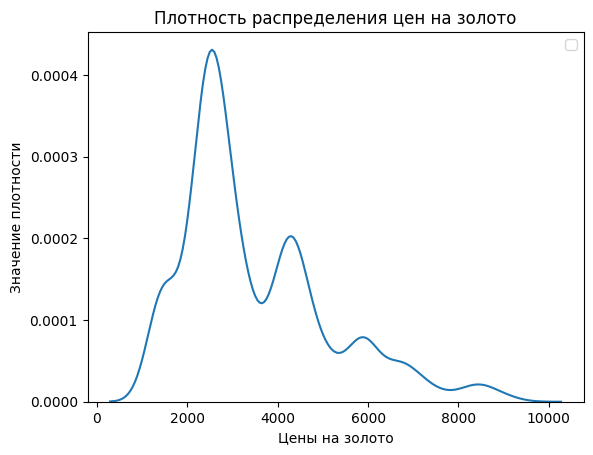

In [26]:
sns.kdeplot(RESULT_df['Price_GOLD'])
plt.ylabel('Значение плотности')
plt.xlabel('Цены на золото')
plt.title('Плотность распределения цен на золото')
plt.legend();

Распределение цен на золото похоже на **усеченное нормальное распределение** с ограничением интервала слева = 2000, будем учитывать это при выборе метода тестирования гипотез

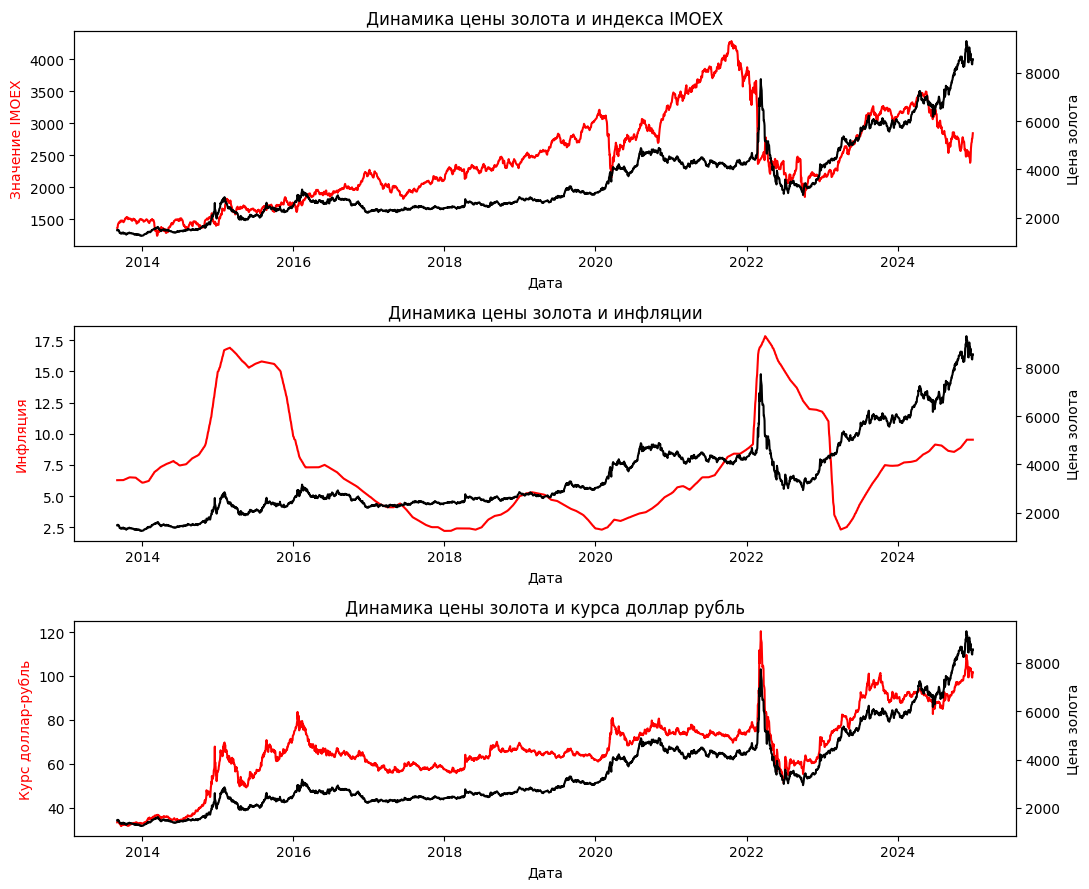

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(11, 9))
ax1 = axes[0]
ax2 = ax1.twinx()
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='AVER_IMOEX', color='red', ax=ax1)
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='Price_GOLD', color='black', ax=ax2)
ax2.tick_params(axis='y', colors='black')
ax1.set_title('Динамика цены золота и индекса IMOEX')
ax1.grid(False)
ax2.grid(False)
ax1.set_ylabel('Значение IMOEX', color='red')
ax2.set_ylabel('Цена золота', color='black')
ax1.set_xlabel('Дата')

ax3 = axes[1]
ax4 = ax3.twinx()
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='Inflation', color='red', ax=ax3, errorbar=None)
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='Price_GOLD', color='black', ax=ax4)
ax4.tick_params(axis='y', colors='black')
ax3.set_title('Динамика цены золота и инфляции')
ax3.grid(False)
ax4.grid(False)
ax3.set_ylabel('Инфляция', color='red')
ax4.set_ylabel('Цена золота', color='black')
ax3.set_xlabel('Дата')

ax5 = axes[2]
ax6 = ax5.twinx()
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='USD_RUB', color='red', ax=ax5, errorbar=None)
sns.lineplot(data=RESULT_df, x='TRADEDATE', y='Price_GOLD', color='black', ax=ax6, errorbar=None)
ax6.tick_params(axis='y', colors='black')
ax5.set_title('Динамика цены золота и курса доллар рубль')
ax5.grid(False)
ax6.grid(False)
ax5.set_ylabel('Курс доллар-рубль', color='red')
ax6.set_ylabel('Цена золота', color='black')
ax5.set_xlabel('Дата')

fig.tight_layout()

plt.show()

**Выводы:**

* Цены на золото и IMOEX: Можно заметить симметрию в графике: когда IMOEX увеличивается цена на золото падает и наоборот. Это возникает потому что во время подъема рынка инвесторы перекладывают деньги из безрисковых активов в фондовый рынок, увеличивая значение индекса

* Цены на золото и инфляция: Согласно финансовой теории золото является хэджирующим активом от инфляции, однако на данном графике в отличие от IMOEX нет явной симметрии графиков, например с 2016 по 2021 год, хотя в 2022 году и в 2014 - в периоды политических нестабильностей явная симметрия также отсутствует. Отсюда возникает гипотеза: **Золото не является хэджирующим активом в условиях экономического кризиса**

* Цены на золото и курс доллар рубль: Можно заметить, что курс доллар-рубль оказывает влияние на золото с небольшим лагом. Отсюда возникает гипотеза: **Курс доллар рубль имеет большую корреляцию с ценой золота с лагом в 7 дней, чем с ценой золота без лага.**

5. **Посмотрим на корреляционные зависимости золота и других активов**

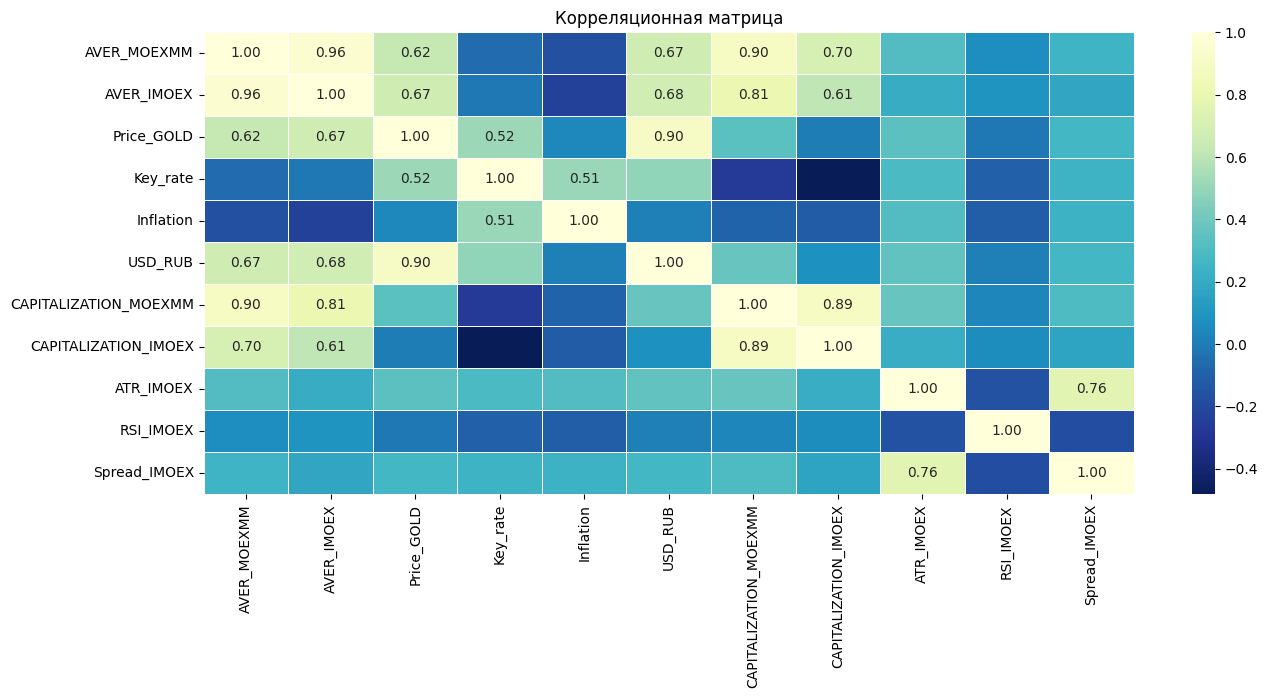

In [28]:
columns=['AVER_MOEXMM', 'AVER_IMOEX',
         'Price_GOLD', 'Key_rate',
         'Inflation',  'USD_RUB',
         'CAPITALIZATION_MOEXMM', 'CAPITALIZATION_IMOEX', 'ATR_IMOEX', 'RSI_IMOEX', 'Spread_IMOEX']
heatmap_data = RESULT_df[columns]
plt.figure(figsize=(15, 6))
corr_matrix = heatmap_data.corr()
set = sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu_r', fmt=".2f", linewidths=.4)
for t in set.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.title("Корреляционная матрица")
plt.show()

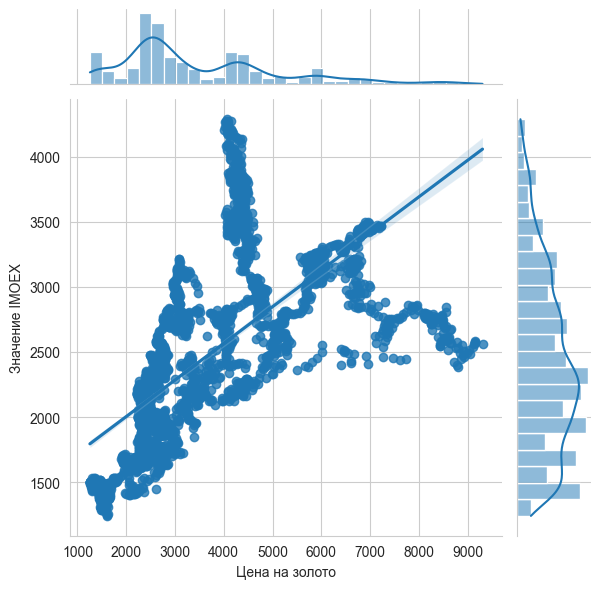

In [29]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Price_GOLD', y = 'AVER_IMOEX', data = RESULT_df, kind = 'reg')
plt.ylabel('Значение IMOEX')
plt.xlabel('Цена на золото')
plt.show()

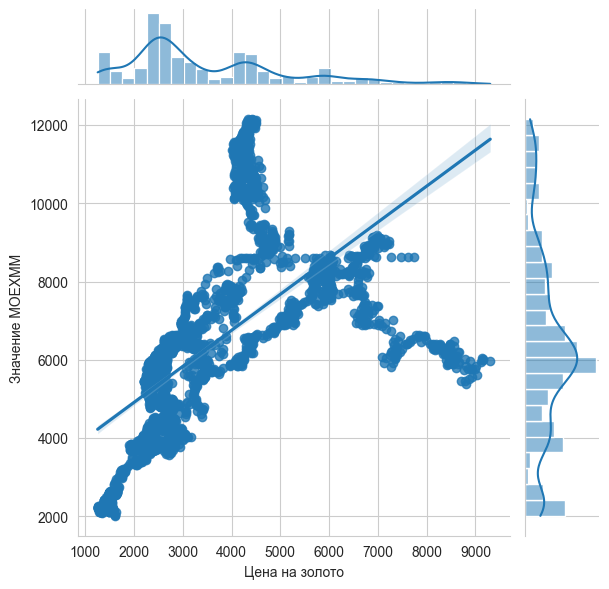

In [30]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Price_GOLD', y = 'AVER_MOEXMM', data = RESULT_df, kind = 'reg')
plt.ylabel('Значение MOEXMM')
plt.xlabel('Цена на золото')
plt.show()

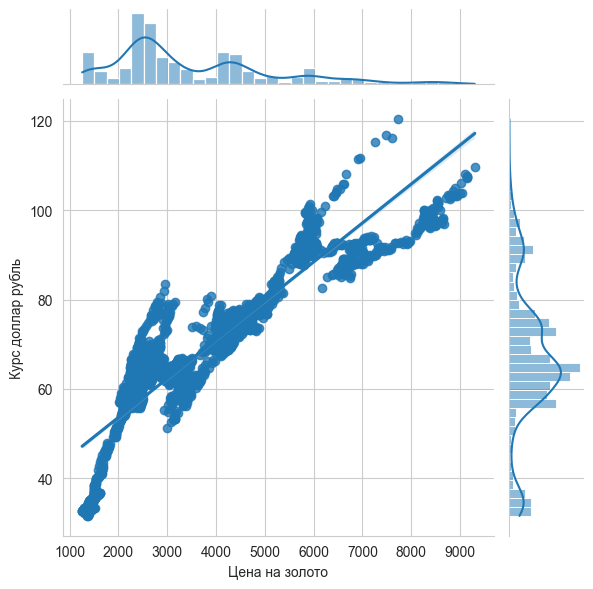

In [31]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Price_GOLD', y = 'USD_RUB', data = RESULT_df, kind = 'reg')
plt.ylabel('Курс доллар рубль')
plt.xlabel('Цена на золото')
plt.show()

**Выводы:**

* Цены на золото сильнее коррелирует индексом IMOEX, чем с MOEXMM (0,67 против 0,62), поэтому как параметр в дальнейшем будет использован IMOEX

* Как и ранее было замечено, между валютным курсом и золотом есть почти линейная зависимость (corr = 0.9)

* Также заметная (от 0,49) корреляция наблюдается между ценой золота и инфляцией (0,51), то есть чем выше инфляция тем выше цена на золото, и с ключевой ставкой (0,52)

6. **Рассмотрим взаимосвязь с экономическим ростом**

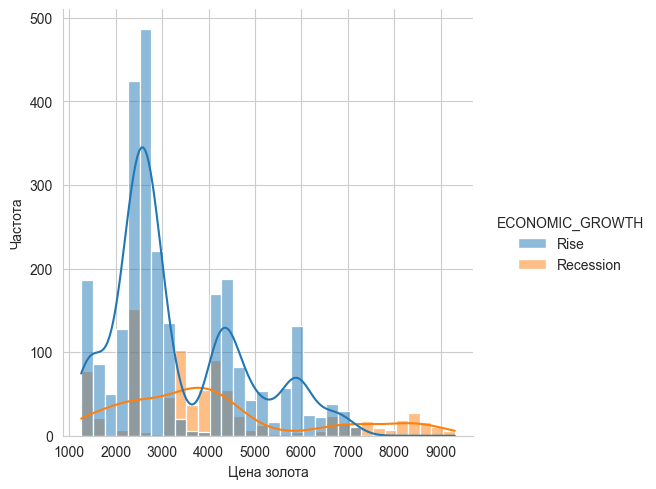

In [32]:
sns.displot(RESULT_df, x="Price_GOLD", hue="ECONOMIC_GROWTH", kde = True)
plt.ylabel('Частота')
plt.xlabel('Цена золота')
plt.show()

**Вывод**: В течение рецессии заметно, что распределение цены золота смещено вправо относительно распределения в фазе роста. Цена золота может быть больше 7500, чего не бывает во время экономического подъема (в течение роста стоимость как правило распределенена от 2000 до 3000), при этом есть значения от 4000 до 7000, но они обладают меньшей частотой. 


Преобразуем нечисловые признаки при помощи one-hot encoding

In [33]:
RESULT_df = pd.get_dummies(RESULT_df)
RESULT_df = RESULT_df.reset_index() 

In [34]:
RESULT_df.head()

,TRADEDATE,CLOSE_IMOEX,OPEN_IMOEX,HIGH_IMOEX,LOW_IMOEX,VALUE_IMOEX,CAPITALIZATION_IMOEX,CLOSE_MOEXMM,OPEN_MOEXMM,HIGH_MOEXMM,...,SMA_long,RSI_IMOEX,ATR_IMOEX,Price_GOLD_Lagged,Day_type_выходной,Day_type_рабочий день,DYNAMICS_IMOEX_Fall,DYNAMICS_IMOEX_Growth,ECONOMIC_GROWTH_Recession,ECONOMIC_GROWTH_Rise
0,2013-09-02,1367.53,1364.75,1373.73,1364.27,1.274407e+10,6.096417e+12,2109.53,2103.86,2120.72,...,1443.644725,100.0,22.518929,1487.36,False,True,False,True,False,True
1,2013-09-03,1373.82,1366.99,1384.18,1366.99,2.216425e+10,6.124461e+12,2102.51,2109.79,2123.56,...,1443.644725,100.0,22.518929,1487.36,False,True,False,True,False,True
2,2013-09-04,1375.66,1372.98,1376.42,1365.21,1.692969e+10,6.132675e+12,2109.74,2101.98,2112.03,...,1443.644725,100.0,22.518929,1487.36,False,True,False,True,False,True
3,2013-09-05,1422.40,1375.66,1422.40,1373.29,3.763559e+10,6.341025e+12,2161.35,2110.70,2162.06,...,1443.644725,100.0,22.518929,1487.36,False,True,False,True,False,True
4,2013-09-06,1423.40,1421.86,1448.75,1418.80,5.218912e+10,6.345500e+12,2157.45,2159.63,2199.92,...,1443.644725,100.0,22.518929,1487.36,False,True,False,True,False,True


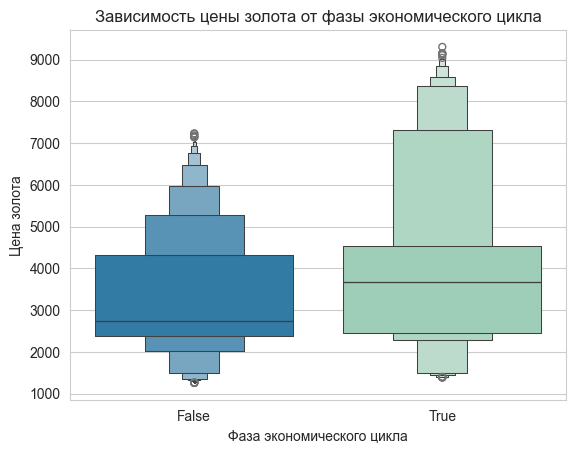

In [35]:
sns.boxenplot(x="ECONOMIC_GROWTH_Recession", y="Price_GOLD", data=RESULT_df, palette = 'YlGnBu_r')
plt.ylabel('Цена золота')
plt.xlabel('Фаза экономического цикла')
plt.title("Зависимость цены золота от фазы экономического цикла")
plt.show()

**Вывод:** Этот график иллюстрирует вывод, сделанный ранее: медиана цены золота, когда экономика растет составляет примерно 2700 и цены распределены от 2000 до 7000, количество выбросов незначительно и сконцентрировано в районе 7000. Во время кризисов распределение смещается выше (от 2500 до 9000) с медианой примерно 3700.

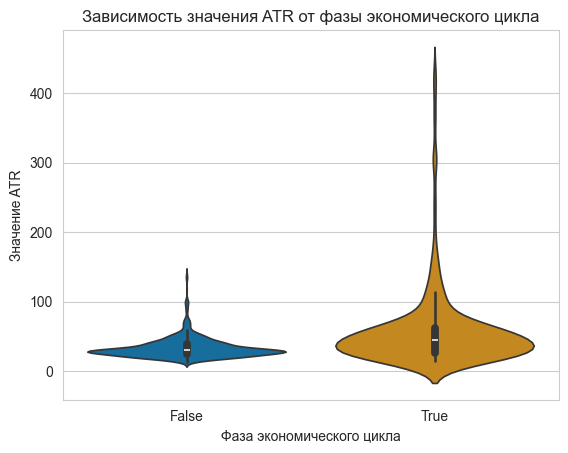

In [36]:
sns.violinplot(x="ECONOMIC_GROWTH_Recession", y="ATR_IMOEX", data=RESULT_df, palette = 'colorblind')
plt.ylabel('Значение ATR')
plt.xlabel('Фаза экономического цикла')
plt.title("Зависимость значения ATR от фазы экономического цикла")
plt.show()

Таким образом, мы сформировали следующие гипотезы:

* 1) **H0:** Сезонность не оказывает влияние на изменение цены золота.

     **H1:** Сезонность оказывает значимое влияние на повышение цены золота.

* 2) **H0:** Золото не является хеджирующим активом в условиях экономического кризиса.

     **H1:** Золото является хэджирующим активом в условиях экономического кризиса

* 3) **H0:** Курс доллара иммет одинаковую корреляцию с ценой золота с лагом в 7 дней и с ценой без лага.

     **H1:** Курс доллар рубль имеет большую корреляцию с ценой золота с лагом в 7 дней, чем с ценой золота без лага.

In [37]:
RESULT_df.to_csv('RESULT_df_itog', index=False)